# 第10章　Pandas: 経済データ分析I

## はじめに

In [3]:
%pip install -q japanize-matplotlib-jlite py4macro
import japanize_matplotlib_jlite
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

## データフレームとシリーズの基本

### データフレームとシリーズについて

### データの読み込み

コード10.2.1

In [4]:
df1 = pd.read_csv("data1.csv")
df1

,year,gdp,consumption
0,2018,554766.5,302625.8
1,2019,552535.4,300738.3
2,2020,529501.5,287377.6
3,2021,543779.9,289492.7
4,2022,548863.4,295503.4
5,2023,556487.4,297984.5
6,2024,557434.1,297844.4


### データの基本的な操作

コード10.2.2

In [5]:
df1.shape

(7, 3)

コード10.2.3

In [6]:
df1["gdp"]

0    554766.5
1    552535.4
2    529501.5
3    543779.9
4    548863.4
5    556487.4
6    557434.1
Name: gdp, dtype: float64

コード10.2.4

In [7]:
df1[["gdp"]]

,gdp
0,554766.5
1,552535.4
2,529501.5
3,543779.9
4,548863.4
5,556487.4
6,557434.1


コード10.2.5

In [8]:
df1[["year", "gdp"]]

,year,gdp
0,2018,554766.5
1,2019,552535.4
2,2020,529501.5
3,2021,543779.9
4,2022,548863.4
5,2023,556487.4
6,2024,557434.1


### ベクトル化演算

コード10.2.6

In [9]:
np.log( df1["gdp"] )

0    13.226303
1    13.222273
2    13.179691
3    13.206300
4    13.215605
5    13.229400
6    13.231100
Name: gdp, dtype: float64

コード10.2.7

In [10]:
df1["consumption"] / df1["gdp"]

0    0.545501
1    0.544288
2    0.542732
3    0.532371
4    0.538392
5    0.535474
6    0.534313
dtype: float64

### 列の追加

コード10.2.8

In [11]:
df1["con/gdp"] = df1["consumption"] / df1["gdp"]

## 簡単なデータ分析

### 一人当たりGDP

コード10.3.1

In [12]:
df2 = pd.read_csv("data2.csv")

print(f"行：{df2.shape[0]}")
print(f"列：{df2.shape[1]}")

df2.head(3)

行：45
列：3


,year,gdp,pop
0,1980,273389.5,11676.9
1,1981,285037.6,11762.3
2,1982,294386.1,11845.1


コード10.3.2

In [13]:
df2["gdppc"] = df2["gdp"] / df2["pop"]
df2["gdppc_log"] = np.log( df2["gdppc"] )
df2.tail(3)

,year,gdp,pop,gdppc,gdppc_log
42,2022,548863.4,12506.3,43.886953,3.781617
43,2023,556487.4,12448.2,44.704246,3.800068
44,2024,557434.1,12389.0,44.994277,3.806535


コード10.3.3

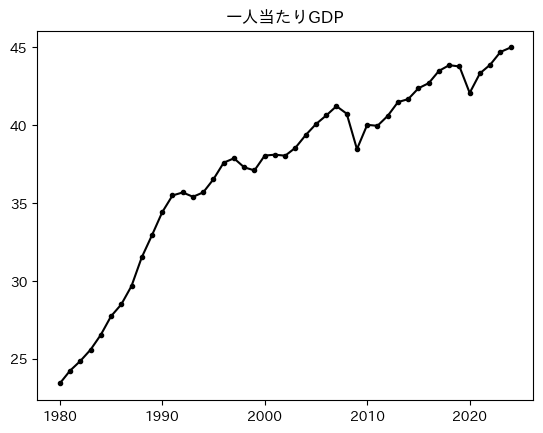

In [14]:
plt.plot("year", "gdppc",
         data=df2,
         color="black",
         marker=".")
plt.title("一人当たりGDP")
plt.show()

コード10.3.4

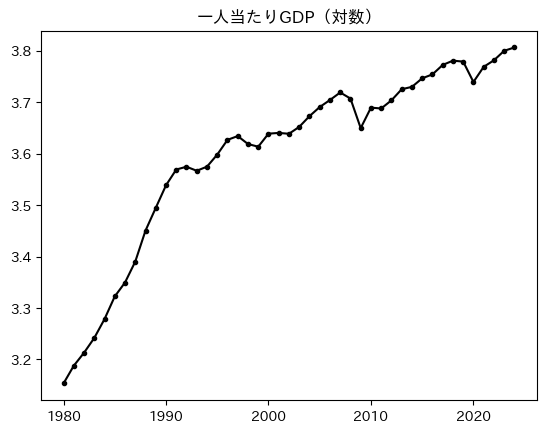

In [15]:
plt.plot("year", "gdppc_log",
         data=df2,
         color="black",
         marker=".")
plt.title("一人当たりGDP（対数）")
plt.show()

### 成長率

コード10.3.5

In [16]:
df2["growth"] = 100 * df2[["gdppc_log"]].diff()
df2[["gdppc_log", "growth"]].head()

,gdppc_log,growth
0,3.153285,NaN
1,3.187722,3.443661
2,3.212978,2.525629
3,3.241738,2.875975
4,3.278391,3.665359


コード10.3.6

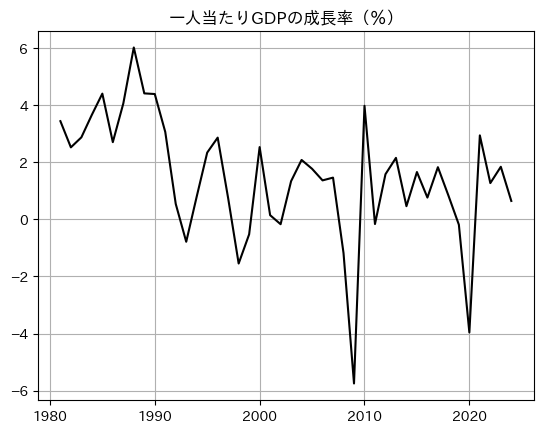

In [17]:
plt.plot("year", "growth",
         data=df2,
         color="black")
plt.title(
    "一人当たりGDPの成長率（％）"
    )
plt.grid()
plt.show()

コード10.3.7

In [18]:
print( df2["growth"].max() )
print( df2["growth"].min() )

6.026368326577813
-5.751244457247084


### 平均成長率

コード10.3.8

In [19]:
df2["gdppc"].pct_change()

0          NaN
1     0.035036
2     0.025578
3     0.029177
4     0.037334
5     0.045069
6     0.027446
7     0.041472
8     0.062117
9     0.045164
10    0.044927
11    0.031140
12    0.005444
13   -0.007807
14    0.008038
15    0.023692
16    0.029083
17    0.007408
18   -0.015344
19   -0.005213
20    0.025669
21    0.001484
22   -0.001685
23    0.013490
24    0.021061
25    0.017896
26    0.013771
27    0.014752
28   -0.011740
29   -0.055890
30    0.040628
31   -0.001616
32    0.015965
33    0.021805
34    0.004643
35    0.016742
36    0.007681
37    0.018470
38    0.008431
39   -0.001860
40   -0.038855
41    0.029887
42    0.012811
43    0.018623
44    0.006488
Name: gdppc, dtype: float64

コード10.3.9

In [20]:
print( df2["growth"].mean() )

1.484659820145108


### GDPの構成要素

コード10.3.10

In [21]:
df3 = pd.read_csv("data3.csv")
df3.columns

Index(['year', 'gdp', 'consumption', 'investment', 'government', 'exports',
       'imports'],
      dtype='object')

コード10.3.11

In [22]:
print(f"行：{df3.shape[0]}")
print(f"列：{df3.shape[1]}")

行：45
列：7


コード10.3.12

In [23]:
df3["netx"] = (df3["exports"] -
               df3["imports"])

コード10.3.13

In [24]:
cols = ["consumption", "investment", "government", "netx"]
ratios = ["con/gdp", "inv/gdp", "gov/gdp", "nx/gdp"]

for ratio, col  in zip(ratios, cols):
    df3[ratio] = df3[col] / df3["gdp"]

df3.columns

Index(['year', 'gdp', 'consumption', 'investment', 'government', 'exports',
       'imports', 'netx', 'con/gdp', 'inv/gdp', 'gov/gdp', 'nx/gdp'],
      dtype='object')

コード10.3.14

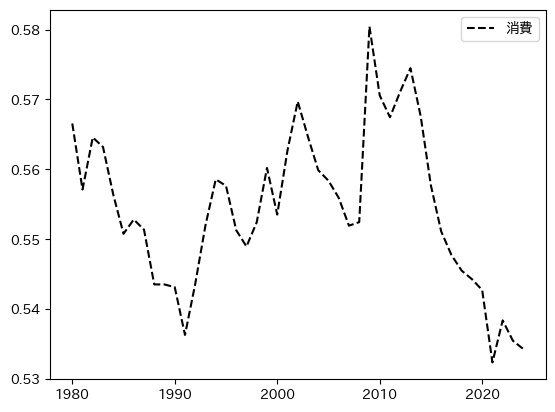

In [25]:
plt.plot("year",
         "con/gdp",
         data=df3,
         color="black",
         linestyle="--",
         label="消費")
plt.legend()
plt.show()

コード10.3.15

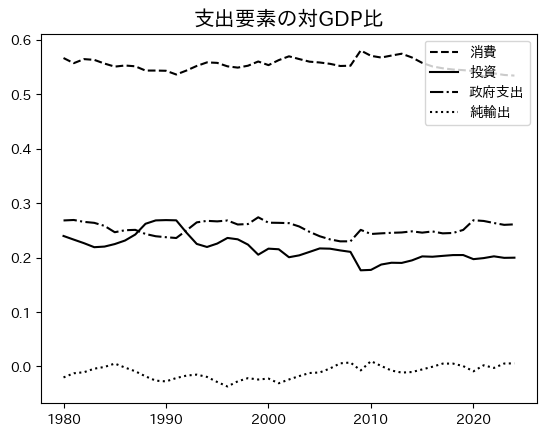

In [26]:
labels = ["消費", "投資",
          "政府支出", "純輸出"]
styles = ["--", "-", "-.", ":"]

for ratio, label, style in zip(
    ratios, labels, styles):

    plt.plot("year",
             ratio,
             data=df3,
             color="black",
             linestyle=style,
             label=label)
plt.legend()
plt.title("支出要素の対GDP比",
          size=15)
plt.show()

上のコードでは凡例と消費の消費の線が重なっています。本の中では説明しませんでしたが，次のコードを使ったプロットを本の中で使っています。
違いがある行に「引数が追加されている」とコメントしています。引数の説明：
* `loc='upper right'`
    * 凡例枠の右上の角を基準点に設定します。つまり，凡例の「右上の角」をどこに置くかを決めるための基準です。
* `bbox_to_anchor=(1.0, 0.87)`
    * 凡例を配置する位置を座標で指定します。
    * ここでは2要素`(1.0, 0.87)`が座標に使われています。
    * 図の左下が座標`(0,0)`，右上が座標`(1,1)`として解釈されます。

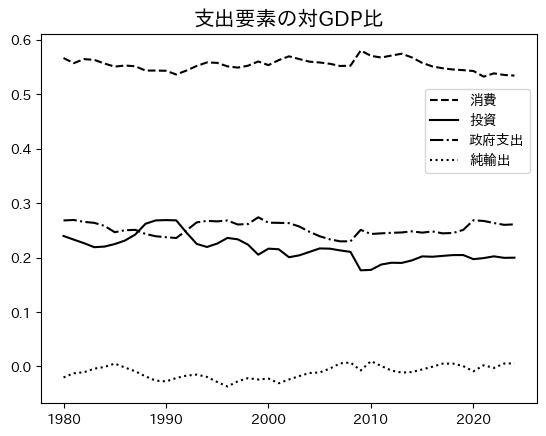

In [32]:
labels = ["消費", "投資",
          "政府支出", "純輸出"]
styles = ["--", "-", "-.", ":"]

for ratio, label, style in zip(
    ratios, labels, styles):

    plt.plot("year",
             ratio,
             data=df3,
             color="black",
             linestyle=style,
             label=label)
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.87))  # 引数が追加されている
plt.title("支出要素の対GDP比",
          size=15)
plt.show()

コード10.3.16

In [28]:
print("各支出要素の平均対GDP比")
print("-"*20)
for ratio in ratios:
    res = df3[ratio].mean()
    print(f"{ratio}：　{res:.3f}")

各支出要素の平均対GDP比
--------------------
con/gdp：　0.554
inv/gdp：　0.217
gov/gdp：　0.253
nx/gdp：　-0.010


コード10.3.17

In [29]:
for col in ["exports", "imports"]:
    res = ( df3[col]/df3["gdp"] ).mean()
    print(f"{col}： {res:.3f}")

exports： 0.125
imports： 0.136


コード10.3.8

In [30]:
print("各支出要素の対GDP比\nの標準偏差")
print("-"*18)

for ratio in ratios:
    res = df3[ratio].std()
    print(f"{ratio}：　{res:.4f}")

各支出要素の対GDP比
の標準偏差
------------------
con/gdp：　0.0113
inv/gdp：　0.0227
gov/gdp：　0.0119
nx/gdp：　0.0121
